# Exercise 03 : Bar charts

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
checker = pd.io.sql.read_sql(query, con, parse_dates=['timestamp'])
checker['day'] = checker['timestamp'].dt.day
checker['weekday'] = checker['timestamp'].dt.dayofweek
checker['hour'] = checker['timestamp'].dt.hour
checker['type'] = checker['weekday'].apply(
    lambda x: "working_day" if x < 5 else "weekend"
)
checker = checker.drop(columns = ['weekday'])
checker = checker.groupby(by=['type', 'day', 'hour']).count()
checker = checker.groupby(by=['type', 'hour']).mean().reset_index()
checker.columns = ['type', 'hour', 'count']
checker

,type,hour,count
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [4]:
pivot = pd.pivot(checker, values='count', index='hour', columns='type')
df = pivot.index
for i in range(0, 24):
    if i not in df:
        pivot.loc[i] = [0, 0]
pivot.sort_index(inplace=True)
pivot = pivot.fillna(0)
pivot

type,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,0.000000
2,0.000000,0.000000
3,1.000000,2.000000
4,0.000000,0.000000
5,2.000000,7.500000
6,0.000000,1.500000
7,4.000000,5.166667
8,7.000000,3.700000


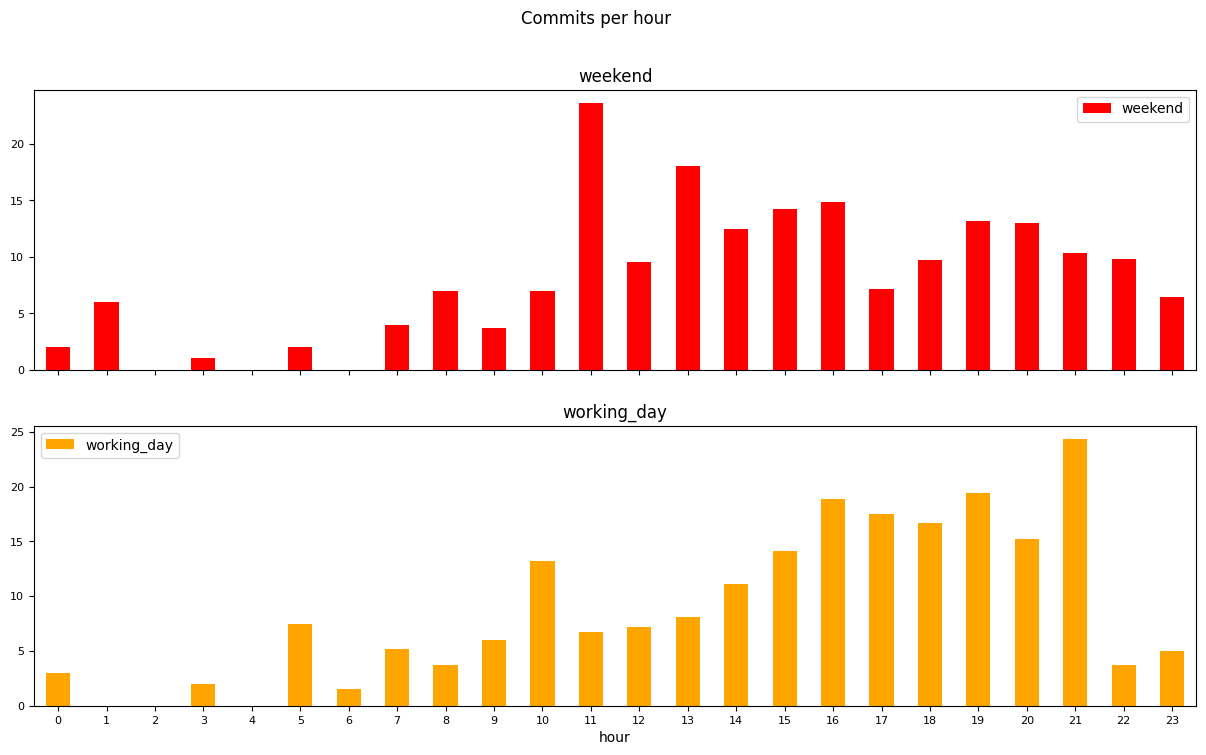

In [5]:
plot = pivot.plot(kind='bar',
        fontsize=8, 
        figsize=(15, 8),
        title='Commits per hour',
        rot=0,
        color=['red', 'orange'],
        subplots=True
        )

## Is the dynamic different on working days and weekends?

In [6]:
pivot[pivot['working_day'] == pivot['working_day'].max()]

type,weekend,working_day
hour,,
21,10.285714,24.333333


In [7]:
pivot[pivot['weekend'] == pivot['weekend'].max()]

type,weekend,working_day
hour,,
11,23.6,6.769231


## The answer is __yes__: the hour when the largest number of commits during working days is __21__, during weekend is __11__

In [8]:
con.close()